# A. Récupération des données  

"description"

## A.1 - Choix des données 
"explication"
- choix de la base 
- choix du cours 
- choix des dates (strat + end)

## A.2 - Importation et traitement des données

Les données historiques de l'action NVIDIA sont collectées à partir d'une source de données financières ouverte. Le jeu de données contient les informations de trading quotidiennes, notamment la date, les cours d'ouverture (Open), les plus hauts (High), les plus bas (Low), les cours de clôture (Close) ainsi que le volume de transactions, qui vont constituer le fondement de cette analyse.

In [46]:
import yfinance as yf
import pandas as pd

#On se concentre sur l'action de NVIDIA, sur une periode de 10 ans qui s'étend de début 2015 à fin 2024
ticker = "NVDA"
start_date = "2015-01-01"
end_date = "2024-12-31"

#Téléchargement des données historiques boursières et création du dataframe sur lequel nous travaillerons
# Nous utilisons l'API yfinance pour extraire les données de marché ouvertes de Yahoo Finance
nvda_data = yf.download(ticker, start=start_date, end=end_date)




#Visualisation rapide de la structure des variables et de la base de données
nvda_data.head()
# Extraction de la Date de l'index pour en faire une colonne accessible aux fonctions d'analyse et de visualisation.
nvda_data.reset_index(inplace=True)

# Simplifie les noms de colonnes à plusieurs niveaux (MultiIndex) automatiquement crée par Yahoo Finance en une seule ligne de texte
nvda_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) and col[1] else col[0] for col in nvda_data.columns.values]
nvda_data.head()

# Trie les données par ordre chronologique pour s'assurer que l'analyse temporelle suit la bonne séquence. Normalement, Yahoo Finance renvoi les données dans le bon ordre chronologique mais dans le doute on fait ce tri.
nvda_data = nvda_data.sort_values(by='Date')
nvda_data.head()

C:\Users\khaya\AppData\Local\Temp\ipykernel_1360\3747514754.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
0,2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000
1,2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000
2,2015-01-06,0.460457,0.476053,0.459977,0.475573,197764000
3,2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000
4,2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000


Dans cette étape, nous inspectons le jeu de données pour nous assurer que toutes les colonnes possèdent les noms et les types de données appropriés. Les valeurs manquantes sont identifiées et traitées afin de préserver l'intégrité des données. Les statistiques de base et les corrélations sont analysées pour comprendre les relations entre les variables et préparer le jeu de données pour une ingénierie des caractéristiques (feature engineering) et une modélisation fiables

In [ ]:
# On ne garde que les variables essentielles pour l'analyse, L'API Yfinance importe des fois d'autres variables inutiles pour notre projet
columns_to_keep = ['Date', 'Close_NVDA', 'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA']
nvda_data = nvda_data[columns_to_keep]



# On regarde si des données sont manquantes, ce qui est assez rare avec Yahoo finance.
nvda_data.isnull().sum()
# Parfois l'API peut renvoyer deux fois la même journée, on cherche si il y a des doublons.
nvda_data['Date'].duplicated().sum()
nvda_data.info()

#La base de données est clean, donc on la telecharge au format .csv
nvda_data.to_csv("nvda_stock_data.csv")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2515 non-null   datetime64[ns]
 1   Close_NVDA   2515 non-null   float64       
 2   High_NVDA    2515 non-null   float64       
 3   Low_NVDA     2515 non-null   float64       
 4   Open_NVDA    2515 non-null   float64       
 5   Volume_NVDA  2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


In [21]:
# Basic descriptive statistics
nvda_data.describe()


,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
count,2515,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,2019-12-31 01:37:54.512922624,20.739435,21.116072,20.327970,20.740396,4.677557e+08
min,2015-01-02 00:00:00,0.459257,0.467895,0.454458,0.463576,5.244800e+07
25%,2017-07-01 12:00:00,3.543652,3.593677,3.449001,3.514977,3.058760e+08
50%,2019-12-31 00:00:00,6.471354,6.534971,6.334466,6.434966,4.150390e+08
75%,2022-06-29 12:00:00,21.211423,21.720754,20.779196,21.132574,5.641060e+08
max,2024-12-30 00:00:00,148.829056,152.837669,146.209911,149.298887,3.692928e+09
std,NaN,32.237857,32.837188,31.596989,32.270089,2.535812e+08


In [15]:
#Analyse de la correlation entre les différentes variables de la base de données
nvda_data.corr()

,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,1.000000,0.727181,0.727164,0.726927,0.726621,-0.039112
Close_NVDA,0.727181,1.000000,0.999768,0.999837,0.999540,-0.144604
High_NVDA,0.727164,0.999768,1.000000,0.999762,0.999847,-0.141944
Low_NVDA,0.726927,0.999837,0.999762,1.000000,0.999760,-0.146728
Open_NVDA,0.726621,0.999540,0.999847,0.999760,1.000000,-0.143940
Volume_NVDA,-0.039112,-0.144604,-0.141944,-0.146728,-0.143940,1.000000


In [35]:
# Skewness (Asymétrie) : Mesure la symétrie de la distribution des rendements. Un skew positif indique des hausses extrêmes plus fréquentes, tandis qu'un skew négatif signale un risque de pertes brutales plus élevé.
print(f"Skewness des prix : {nvda_data['Close_NVDA'].skew()}")

Skewness des prix : 2.434613586384927


# B. Analyse Descriptive

Dans cette section, nous explorons les tendances du cours de l'action NVIDIA, les rendements et la volatilité au fil du temps. Des indicateurs clés tels que les rendements quotidiens, les moyennes mobiles et la volatilité glissante sont calculés. La visualisation aide à identifier des schémas, des tendances et des niveaux de risque, guidant ainsi la sélection des variables pour la modélisation.

- méhode utilisée
- pourquoi utilisée 

## B.1 - Calcul de descriptives générales


In [60]:
nvda_data['Daily_Return'] = nvda_data['Close_NVDA'].pct_change()

Cette ligne calcule la variation quotidienne en pourcentage du prix de clôture de l'action NVIDIA. Elle montre à quel point le prix de l'action a augmenté ou diminué par rapport au jour de bourse précédent. La formule utilisée est : Rendement quotidien = (Prix de clôture du jour - Prix de clôture d'hier) / Prix de clôture d'hier. Cet indicateur est couramment utilisé en analyse financière pour mesurer la performance et la volatilité d'une action.

In [61]:
# Rendement cumulé (en supposant un investissement initial de 1)
nvda_data['Cumulative_Return'] = (1 + nvda_data['Daily_Return']).cumprod()

In [ ]:
nvda_data['MA20'] = nvda_data['Close_NVDA'].rolling(window=20).mean()
nvda_data['MA50'] = nvda_data['Close_NVDA'].rolling(window=50).mean()
nvda_data['MA200'] = nvda_data['Close_NVDA'].rolling(window=200).mean()

Ces lignes calculent les moyennes mobiles du cours de clôture de NVIDIA sur différentes périodes.

MA20 : Tendance à court terme (environ 1 mois de bourse). 
MA50 : Tendance à moyen terme. 
MA200 : Tendance à long terme (très utilisée pour identifier la direction générale du marché).

Une moyenne mobile lisse les fluctuations de prix à court terme et met en évidence les tendances de fond. Elle est couramment utilisée en analyse financière pour détecter la direction d'une tendance, les niveaux de support et de résistance, ainsi que les signaux potentiels d'achat ou de vente.

In [ ]:
nvda_data['Volatility'] = nvda_data['Daily_Return'].rolling(window=20).std()

Calcule de l'écart-type des rendements sur une fenêtre de 20 jours (environ un mois de trading).
 Cet indicateur sert à quantifier le risque et la nervosité du marché sur le court terme.

In [ ]:
nvda_data['Volume_Change'] = nvda_data['Volume_NVDA'].pct_change()
rolling_max = nvda_data['Close_NVDA'].cummax()
nvda_data['Drawdown'] = (nvda_data['Close_NVDA'] - rolling_max) / rolling_max

Ces lignes calculent le plus haut historique du prix de clôture de NVIDIA à chaque date, puis mesurent le drawdown, c’est-à-dire la baisse en pourcentage du prix par rapport à ce maximum atteint précédemment.

## B.2 - Graphiques 

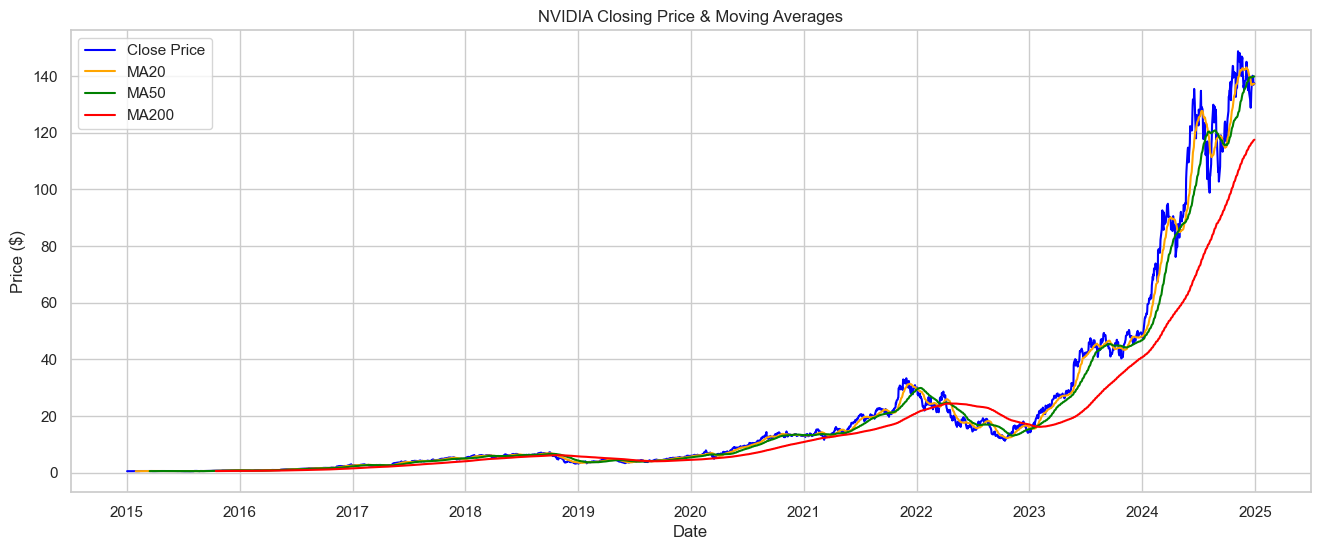

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14,6)

plt.figure(figsize=(16,6))
plt.plot(nvda_data['Date'], nvda_data['Close_NVDA'], label='Close Price', color='blue')
plt.plot(nvda_data['Date'], nvda_data['MA20'], label='MA20', color='orange')
plt.plot(nvda_data['Date'], nvda_data['MA50'], label='MA50', color='green')
plt.plot(nvda_data['Date'], nvda_data['MA200'], label='MA200', color='red')
plt.title("NVIDIA Closing Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

Le graphique ci-dessus visualise les tendances de prix avec les moyennes mobiles.
Le prix de clôture affiche la valeur réelle du marché.
Les lignes MA (20, 50, 200) aident à identifier la direction de la tendance dominante.
les croisements entre le court terme (MA20) et le long terme (MA200) signalent souvent des inversions de tendance (golden cross / death cross).

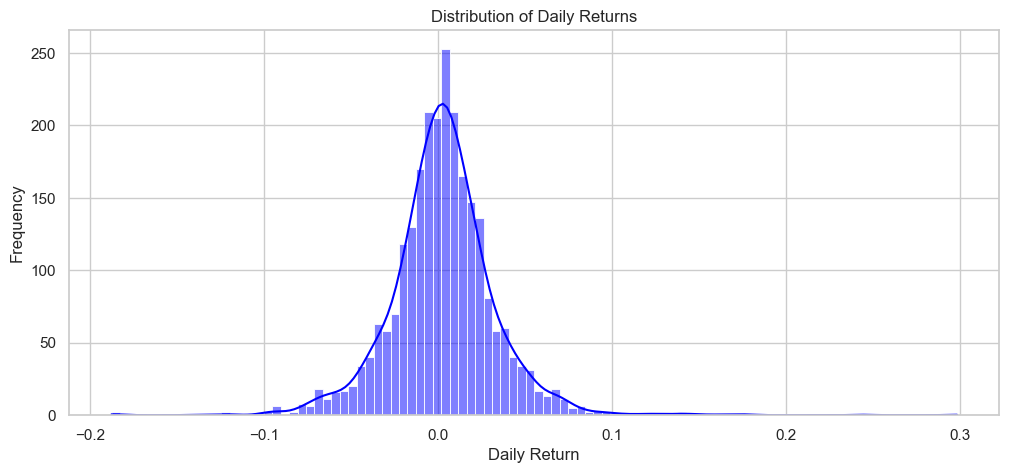

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(nvda_data['Daily_Return'], bins=100, kde=True, color='blue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

Cet histogramme montre la fréquence à laquelle les différentes valeurs de rendement surviennent.
Il aide à visualiser les fluctuations de performance de l'action et à identifier les périodes de haute ou basse volatilité.
La courbe KDE met en évidence la tendance générale de la distribution des rendements quotidiens.

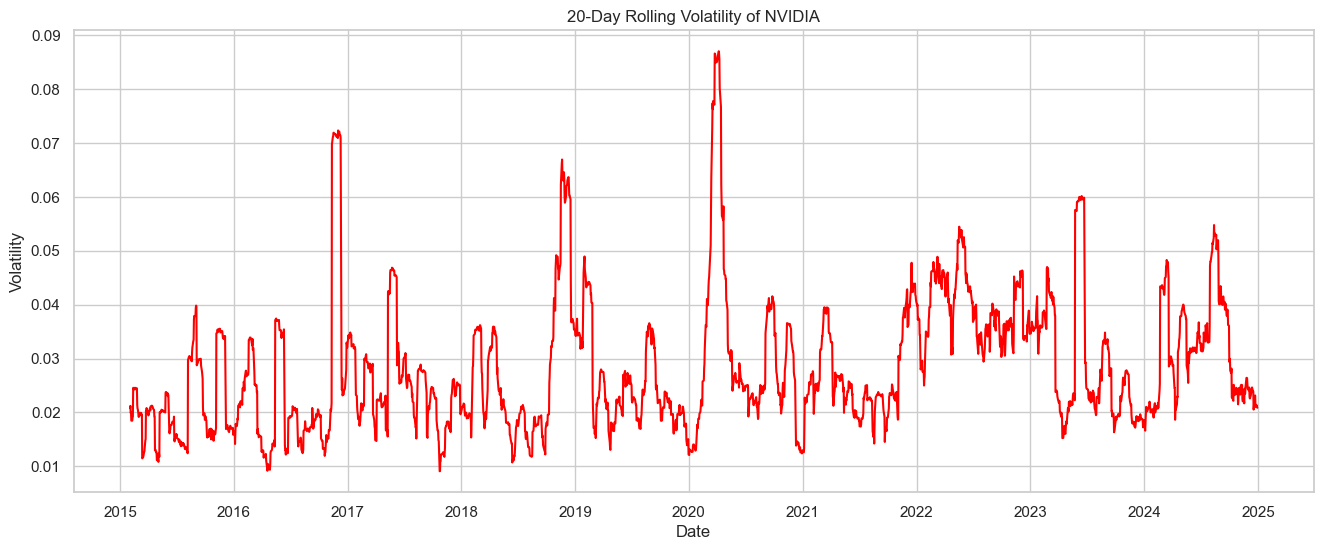

In [41]:
plt.figure(figsize=(16,6))
plt.plot(nvda_data['Date'], nvda_data['Volatility'], color='red')
plt.title("20-Day Rolling Volatility of NVIDIA")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

La volatilité mesure la dispersion des rendements. Les pics dans la ligne rouge ci-dessous indiquent des periodes de forte incertitude et de risque sur le marche. C'est un indicateur crucial pour la gestion du risque et pour adapter les stratégies de trading pendant les périodes turbulentes.

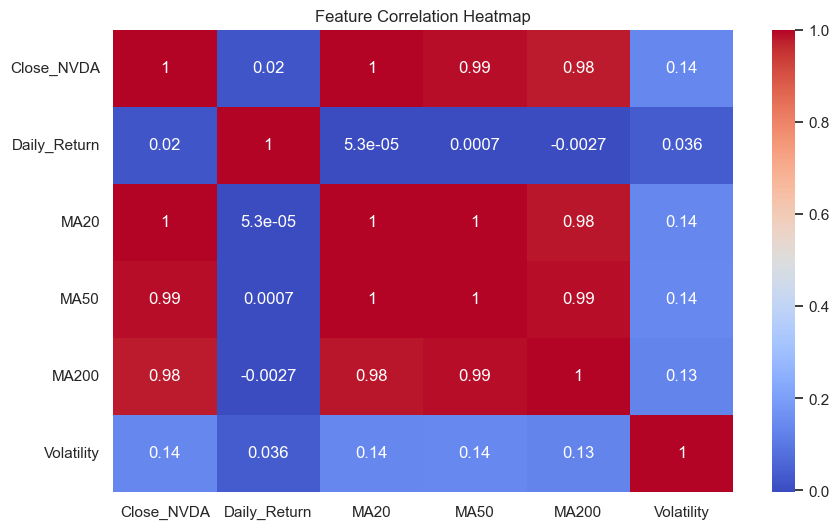

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(nvda_data[['Close_NVDA', 'Daily_Return', 'MA20', 'MA50', 'MA200', 'Volatility']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Cette heatmap visualise la corrélation entre les indicateurs clés comme le prix de clôture, les rendements quotidiens, les moyennes mobiles et la volatilité. Les fortes corrélations indiquent comment les variables sont liées entre elles. Cela aide à guider la sélection des variables pour la modélisation et à comprendre la multicolinéarité.

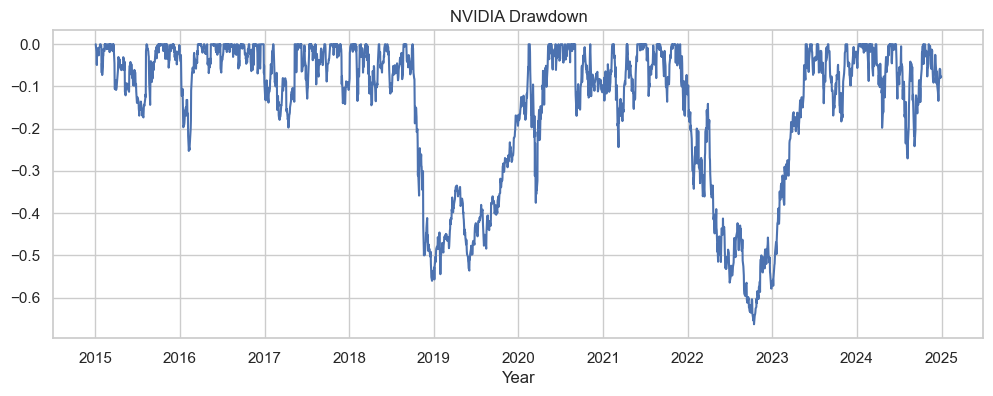

In [58]:
plt.figure(figsize=(12,4))
plt.plot(nvda_data['Drawdown'])
plt.xlabel('Year')
plt.title('NVIDIA Drawdown')
plt.show()


Ce graphique représente le drawdown de l’action NVIDIA, c’est-à-dire la perte relative par rapport au dernier plus haut historique du prix, et permet de visualiser l’ampleur et la durée des périodes de baisse au cours du temps.

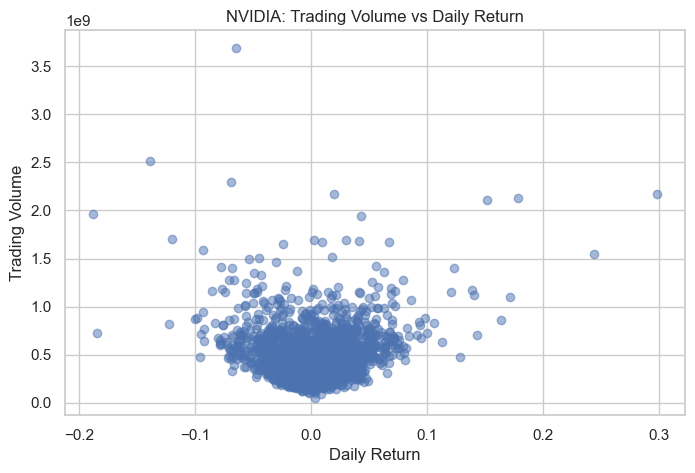

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(
    nvda_data['Daily_Return'],
    nvda_data['Volume_NVDA'],
    alpha=0.5
)
plt.xlabel('Daily Return')
plt.ylabel('Trading Volume')
plt.title('NVIDIA: Trading Volume vs Daily Return')
plt.grid(True)
plt.show()


Ce graphique met en relation les rendements journaliers de l’action NVIDIA (en abscisse) et les volumes échangés (en ordonnée), chaque point correspondant à une journée de trading. Il permet d’analyser le lien entre l’ampleur des variations de prix et l’intensité de l’activité sur le marché.
Le nuage de points est globalement centré autour de zéro sur l’axe des rendements, ce qui montre que la plupart des variations journalières du prix de NVIDIA sont limitées, tandis que les volumes échangés tendent à augmenter lors des journées marquées par des variations plus importantes, qu’elles soient positives ou négatives, traduisant une intensification de l’activité du marché dans ces périodes.

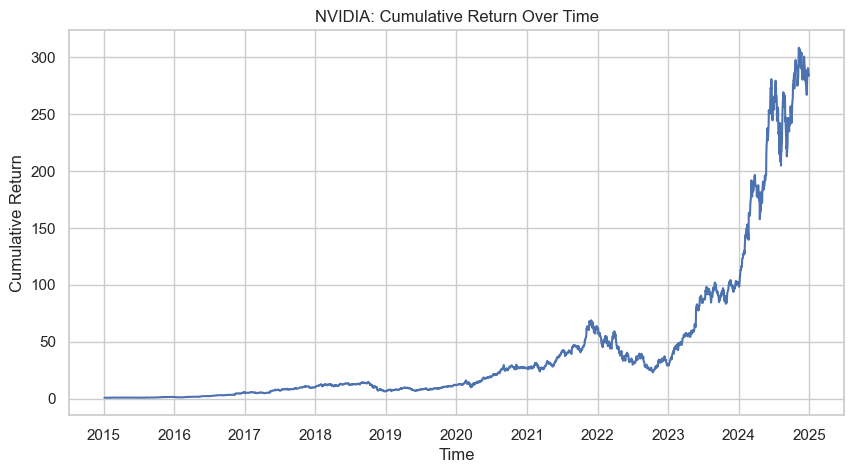

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(
    nvda_data.index,
    nvda_data['Cumulative_Return']
)
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.title('NVIDIA: Cumulative Return Over Time')
plt.grid(True)
plt.show()


Ce graphique présente l’évolution du rendement cumulé de l’action NVIDIA sur la période étudiée, en supposant un investissement initial normalisé à 1 et conservé sur toute la durée. La valeur de cet investissement évolue quotidiennement en fonction des variations du prix de l’action, selon un mécanisme de capitalisation implicite des rendements. Le graphique montre qu’à la fin de la période, la valeur de l’investissement atteint environ 270, ce qui signifie que le prix de l’action NVIDIA a été multiplié par près de 270 sur la période, illustrant une performance exceptionnelle à long terme dans le cadre d’une stratégie d’achat et de conservation.

In [65]:
vix_data = yf.download("^VIX", start=nvda_data.index.min(), end=nvda_data.index.max())


C:\Users\khaya\AppData\Local\Temp\ipykernel_1360\4133422672.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix_data = yf.download("^VIX", start=nvda_data.index.min(), end=nvda_data.index.max())
[*********************100%***********************]  1 of 1 completed


In [66]:
vix_data = vix_data[['Close']]
vix_data = vix_data.rename(columns={'Close': 'VIX'})


Ce graphique compare l’évolution du prix de l’action NVIDIA avec l’indice VIX, qui mesure le niveau de volatilité anticipée du marché. Il permet de replacer les mouvements du titre dans un contexte de stress global et de mettre en évidence que les périodes de forte volatilité du marché, caractérisées par des pics du VIX, coïncident souvent avec des phases de baisse ou d’instabilité du prix de NVIDIA.

# C. Modélisation
Dans cette section, nous préparons les variables explicatives et la cible pour prédire le volume de transactions de NVIDIA pour le jour suivant. Des variables de retard (lags), des moyennes glissantes, des variations en pourcentage et l'amplitude des prix sont créées pour capturer les tendances et la volatilité.

Le jeu de données est divisé chronologiquement en ensembles d'entraînement et de test afin de préserver l'ordre temporel, et la méthode TimeSeriesSplit est utilisée pour la validation croisée afin d'évaluer la performance du modèle sur des données futures inédites.

Trois modèles de régression sont mis en œuvre : l'Arbre de Décision pour les schémas non linéaires simples, la Forêt Aléatoire (Random Forest) comme méthode d'ensemble pour réduire le surapprentissage, et XGBoost pour l'apprentissage de schémas complexes.

## C.1 - Préparations
"explain"

In [ ]:

#  Import Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# Lag features
# Lagged values of volume and closing price are created to capture temporal dependencies.
# These features represent how previous days' trading activity affects the current day.
nvda_data['Volume_Lag_1'] = nvda_data['Volume_NVDA'].shift(1)
nvda_data['Volume_Lag_2'] = nvda_data['Volume_NVDA'].shift(2)
nvda_data['Close_Lag_1']  = nvda_data['Close_NVDA'].shift(1)

# Rolling averages
# Short-term moving averages of volume are calculated to smooth fluctuations
# and highlight underlying trends over 3-day and 5-day windows.
nvda_data['Vol_MA_3'] = nvda_data['Volume_NVDA'].rolling(3).mean()
nvda_data['Vol_MA_5'] = nvda_data['Volume_NVDA'].rolling(5).mean()


# Percentage changes
# Compute day-to-day relative changes in volume and closing price.
# These features capture short-term momentum and volatility.
nvda_data['Vol_Change'] = nvda_data['Volume_NVDA'].pct_change()
nvda_data['Close_Change'] = nvda_data['Close_NVDA'].pct_change()

# Price range
# Calculates daily range (High - Low) to capture daily price volatility.
nvda_data['Price_Range'] = nvda_data['High_NVDA'] - nvda_data['Low_NVDA']

# Drop NaNs
# Any rows with missing values (due to lag or rolling calculations) are removed.
# Reset index for clean dataset structure.
nvda_data = nvda_data.dropna().reset_index(drop=True)

# Features & target selection
# X contains selected input features that represent market behavior.
# y is the target variable: the next-day trading volume.
features = [
    'Open_NVDA', 'High_NVDA', 'Low_NVDA', 'Close_NVDA',
    'Volume_Lag_1', 'Volume_Lag_2', 'Close_Lag_1',
    'Vol_MA_3', 'Vol_MA_5', 'Vol_Change', 'Close_Change', 'Price_Range'
]

X = nvda_data[features]
y = nvda_data['Volume_NVDA']


## C.2 - Echantillon entrainement 

In [ ]:

# Train-Test Split
# The dataset is split chronologically: first 80% for training, last 20% for testing.
# This preserves the time-series order and prevents data leakage.
split_index = int(len(X) * 0.8)
X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

# Last row for next-day prediction
# Stores the most recent day’s features to predict the next day’s volume.
last_row = X.iloc[-1].values.reshape(1, -1)

# Time-Series Cross-Validation
# TimeSeriesSplit is used to validate models while respecting temporal order.
# This provides a realistic evaluation of model performance on future unseen data.
tscv = TimeSeriesSplit(n_splits=5)

## C.3 - Decision Tree

### C.3.1 - Modèle

In [ ]:
# Initialize and train the Decision Tree model
# max_depth limits tree depth to prevent overfitting, min_samples_leaf ensures minimum samples per leaf
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set and next day
# y_pred_dt contains predictions for the test set
# next_day_dt predicts the trading volume for the most recent day
y_pred_dt = dt_model.predict(X_test)
next_day_dt = dt_model.predict(last_row)

# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These provide insight into accuracy and how well the model explains the variance in the target
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt  = r2_score(y_test, y_pred_dt)

### C.3.2 - CCL

In [ ]:
# Display metrics and next-day prediction
print("\nDecision Tree Metrics:")
print("MSE:", mse_dt, "MAE:", mae_dt, "R²:", r2_dt)
print("Next-Day Predicted Volume:", next_day_dt[0])

The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.81 means the model captured 80
% of the trend and variation correctly.
The remaining 19% is due to unpredictable market fluctuations.
This means the model gives a general idea of the trend, but the exact number can vary day to day.

## C.4 Random forest regression
"explain"

This model uses an ensemble of decision trees to predict next day NVIDIA trading volume.
By averaging multiple trees, it reduces overfitting and improves generalization.
Performance is evaluated using MSE, MAE, and R² metrics, and the model forecasts the next day volume.

### C.4.1 - Modèle

In [ ]:
# Initialize and train the Random Forest model
# n_estimators = 300 trees, max_depth limits tree depth, min_samples_leaf ensures minimum samples per leaf
# n_jobs=-1 uses all CPU cores for faster training
rf_model = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf=20,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test set and next day
# y_pred_rf contains predictions for the test set
# next_day_rf predicts the trading volume for the most recent day
y_pred_rf = rf_model.predict(X_test)
next_day_rf = rf_model.predict(last_row)

# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These indicate model accuracy and how well it explains variance in the target
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf  = r2_score(y_test, y_pred_rf)

### C.4.2 - CCL

In [ ]:
# Display metrics and next-day prediction
print("\nRandom Forest Metrics:")
print("MSE:", mse_rf, "MAE:", mae_rf, "R²:", r2_rf)
print("Next-Day Predicted Volume:", next_day_rf[0])

Random Forest

The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.94 means the model captured 94% of the trend and variation correctly.
The remaining 6% is due to unpredictable market fluctuations.
This means the model gives a very good estimate of the trend and next-day volume.

## C.5 - XG boost regressio
"explain"
XGBoost is a gradient boosting model that combines weak learners sequentially to predict next day NVIDIA trading volume.
It handles complex patterns in the data, reduces bias, and improves prediction accuracy.
Model performance is evaluated using MSE, MAE, and R², and it is also used to forecast the next day volume.

### C.5.1 - Modèle 

In [ ]:
# Initialize and train the XGBoost model
# n_estimators = 300 trees, max_depth limits tree depth, learning_rate controls step size
# subsample and colsample_bytree control randomness to reduce overfitting
xgb_model = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set and next day
# y_pred_xgb contains predictions for the test set
# next_day_xgb predicts the trading volume for the most recent day
y_pred_xgb = xgb_model.predict(X_test)
next_day_xgb = xgb_model.predict(last_row)

# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These indicate model accuracy and how well it explains variance in the target
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb  = r2_score(y_test, y_pred_xgb)

### C.5.2 - CCL

In [ ]:

# Display metrics and next-day prediction
print("\nXGBoost Metrics:")
print("MSE:", mse_xgb, "MAE:", mae_xgb, "R²:", r2_xgb)
print("Next-Day Predicted Volume:", next_day_xgb[0])

XGBoost

The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.99 means the model captured 99% of the trend and variation correctly.
Only 1% difference is due to unpredictable market fluctuations.
This means the model gives a very precise estimate of the trend and next-day volume.

# C. CCL

# BILAN FINAL. COMPARAISON ET INTERPRETATION DES RESULTATS

"explain"

In [1]:
plt.figure(figsize=(12,5))

# Plot actual trading volume
plt.plot(y_test.values, label='Actual Volume', color='black', linewidth=2)

# Plot Decision Tree predictions
plt.plot(y_pred_dt, label='Decision Tree', color='blue', alpha=0.7)

# Plot Random Forest predictions
plt.plot(y_pred_rf, label='Random Forest', color='green', alpha=0.7)

# Plot XGBoost predictions
plt.plot(y_pred_xgb, label='XGBoost', color='red', alpha=0.7)

# Chart formatting
plt.title("NVDA Volume Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Trading Volume")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

NameError: name 'plt' is not defined

final ccl 

